# Spam Mail Detection System

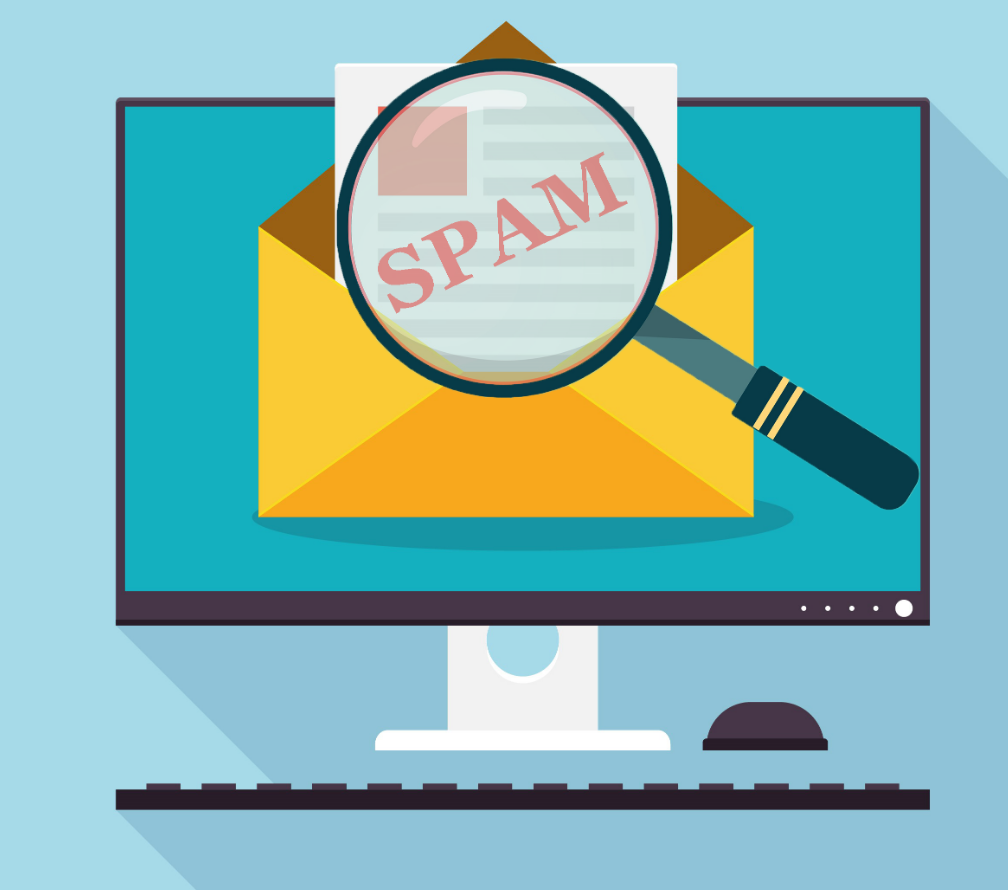

Through this Project I was build a Spam Detection System using Machine Learning Algorithm. First I will cross validate all the algorithms and then only select the best one on the best cross validation score for training, testing and deployment.
At the end of this project I developed a web Application as the final product of this project through which a person can check a message weather it is Spam or not.

### Importing Packeges and Data

In [1]:
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report 

In [2]:
spam_df = pd.read_csv('spam.csv')

### Data Exploration

In [3]:
spam_df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
spam_df.shape

(5572, 2)

In [5]:
spam_df.describe()

Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30

In [6]:
spam_df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Data Transformation

In [7]:
spam_df['Spam'] = pd.get_dummies(spam_df['Category'],drop_first=True)

In [8]:
spam_df.head()

Category                                            Message  Spam
0      ham  Go until jurong point, crazy.. Available only ...     0
1      ham                      Ok lar... Joking wif u oni...     0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     1
3      ham  U dun say so early hor... U c already then say...     0
4      ham  Nah I don't think he goes to usf, he lives aro...     0

In [9]:
# Text Cleaning like removing special characters, numbers and lowercase all the characters

def cleaner(text):
    text = re.sub('[^A-Za-z]',' ',text)
    return text.lower()
text = spam_df['Message'].apply(cleaner)
labels = spam_df['Spam']

In [10]:
# Text Vectorization using TFIDF. This converts textual data into numpy array.

vectorizer = TfidfVectorizer(max_features=1000,stop_words='english')
text_vectors = vectorizer.fit_transform(text).toarray()
print('Text vectors shape :',text_vectors.shape)

Text vectors shape : (5572, 1000)


In [11]:
# Handling imbalanced data by over sampling

x,y = RandomOverSampler().fit_resample(text_vectors,labels)
np.unique(y,return_counts=True)

(array([0, 1], dtype=uint8), array([4825, 4825], dtype=int64))

### Model Building and Cross Validaton

In [12]:
# Cross Validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
cv_lr = cross_val_score(LogisticRegression(),x,y)
cv_lr

array([0.97772021, 0.97927461, 0.98238342, 0.9746114 , 0.97772021])

In [13]:
cv_lr.mean()

0.978341968911917

In [14]:
# Cross Validation using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
cv_dtc = cross_val_score(DecisionTreeClassifier(),x,y)
cv_dtc

array([0.97098446, 0.9865285 , 0.97772021, 0.97098446, 0.97564767])

In [15]:
cv_dtc.mean()

0.9763730569948186

In [16]:
# Cross Validation using Support Vector Machine
from sklearn.svm import SVC
cv_svc = cross_val_score(SVC(kernel='poly',degree=3),x,y)
cv_svc

array([0.99378238, 0.99481865, 0.99378238, 0.98963731, 0.99378238])

In [17]:
cv_svc.mean()

0.9931606217616581

In [18]:
# Cross Validation using K Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
cv_knn = cross_val_score(KNeighborsClassifier(n_neighbors=2),x,y)
cv_knn 

array([0.98549223, 0.99067358, 0.99015544, 0.98911917, 0.99015544])

In [19]:
cv_knn.mean()

0.9891191709844559

In [20]:
# Cross Validation using Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
cv_gnb = cross_val_score(GaussianNB(),x,y)
cv_gnb

array([0.88911917, 0.87875648, 0.88031088, 0.88601036, 0.89015544])

In [21]:
cv_gnb.mean()

0.8848704663212436

In [22]:
# Cross Validation using Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
cv_mnb = cross_val_score(MultinomialNB(),x,y)
cv_mnb

array([0.95803109, 0.96165803, 0.95906736, 0.95544041, 0.96787565])

In [23]:
cv_mnb.mean()

0.9604145077720206

In [24]:
# Cross Validation using Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
cv_bnb = cross_val_score(BernoulliNB(),x,y)
cv_bnb 

array([0.9626943 , 0.96632124, 0.95958549, 0.96217617, 0.96528497])

In [25]:
cv_bnb.mean()

0.9632124352331607

 As the Support Vector Machine Perform the best, So I Choose it as final model for deployment

### Final Model

In [26]:
# Training Spam Detection Model using Machine Learning algorithm Support Vector Machine

xtrian, xtest, ytrian, ytest = train_test_split(x,y,test_size=0.2,stratify=y)
classifier = SVC(kernel='poly',degree=3)
classifier.fit(xtrian,ytrian)
print('Model score :',round(classifier.score(xtest,ytest),3))

Model score : 0.991


In [27]:
# Model Performance Analysis

ypred = classifier.predict(xtest)
print('Confusion Metrics : \n\n',confusion_matrix(ytest,ypred),'\n\n')
print('Classification Report :\n\n',classification_report(ytest,ypred))

Confusion Metrics : 

 [[961   4]
 [ 13 952]] 


Classification Report :

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       965
           1       1.00      0.99      0.99       965

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



### Model Experiment

In [30]:
# Define the prediction function that take th massege or email text as input and returns whether the text is Spam or not

def prediction(msg):
    msg = cleaner(msg)
    msg = vectorizer.transform([msg]).toarray()
    if classifier.predict(msg) == 1:
        print("This is spam")
    else:
        print("this is not spam")

In [31]:
msg = '''Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005.
        Text FA to 87121 to receive entry question(std txt rate) Applications 100% sales.
        '''
prediction(msg)

This is spam


In [32]:
msg = '''Applications are Open for Admission to Amity University. During this COVID-19 lockdown time,
        Amity University is facilitating the entire admission process online to ensure the health and safety of everyone. '''

prediction(msg)

this is not spam


### Save Model

In [33]:
import joblib

In [34]:
joblib.dump(vectorizer,'text_vectorizer.joblib')
joblib.dump(classifier,'spam_mail_detector.joblib')

['spam_mail_detector.joblib']

### Model Deployment using Flask

In [35]:
import joblib, re
vectorizer = joblib.load('text_vectorizer.joblib')
model = joblib.load('spam_mail_detector.joblib')


def cleaner(text):
    text = re.sub('[^A-Za-z]',' ',text)
    return text.lower()

def prediction(msg):
    msg = cleaner(msg)
    msg = vectorizer.transform([msg]).toarray()
    if model.predict(msg) == 1:
        return "The mail you have entered is a spam mail"
    else:
        return "The mail you have entered is a proper mail"

from flask import Flask,render_template,redirect,url_for,request

app = Flask(__name__)

@app.route('/')
@app.route('/home')
def home(prediction='Your Results will show here.'):
    return render_template('prediction.html',text=prediction)

@app.route('/predict',methods=['POST'])
def predict():
    for x in request.form.values():
        msg = x
    is_spam = prediction(msg)    
    return render_template('prediction.html',text=is_spam)


app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


#### Model Deployed Successfully. Lets see how it is..

# Spam Detection Web Application

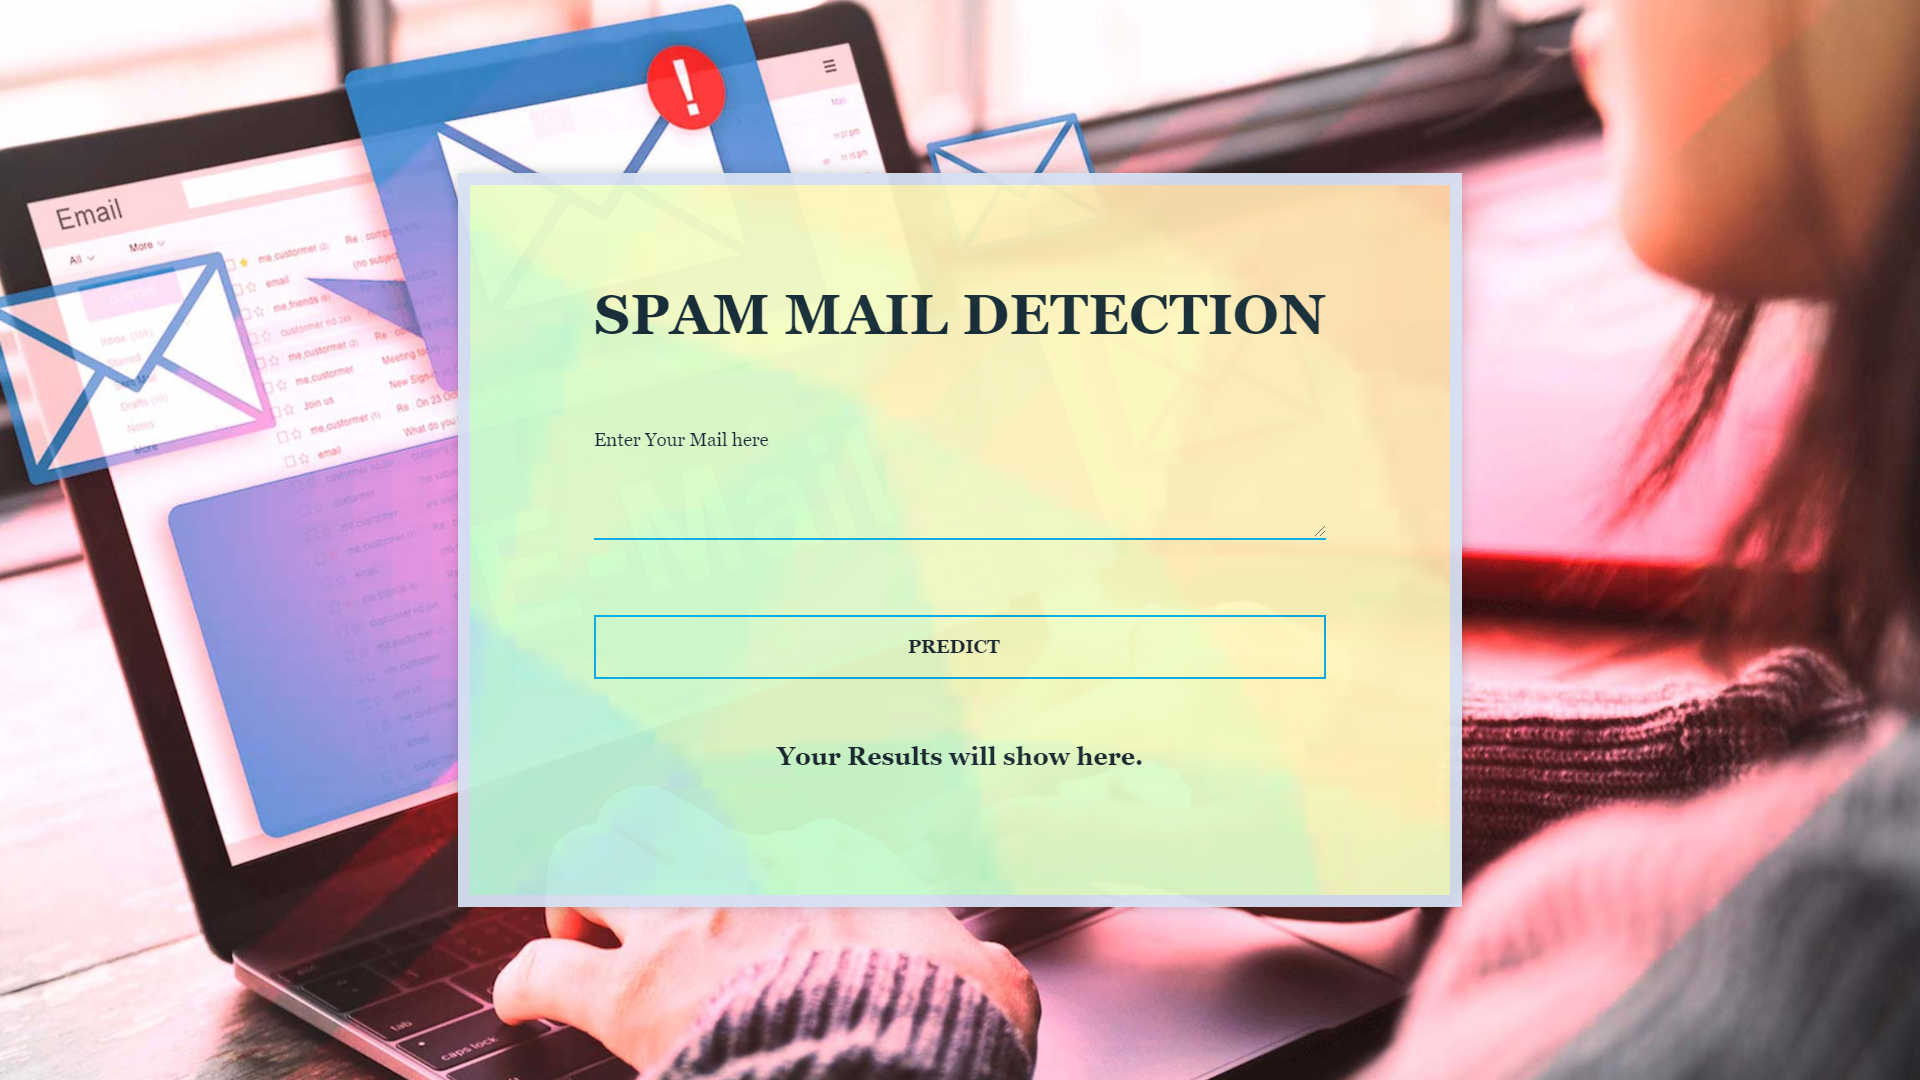

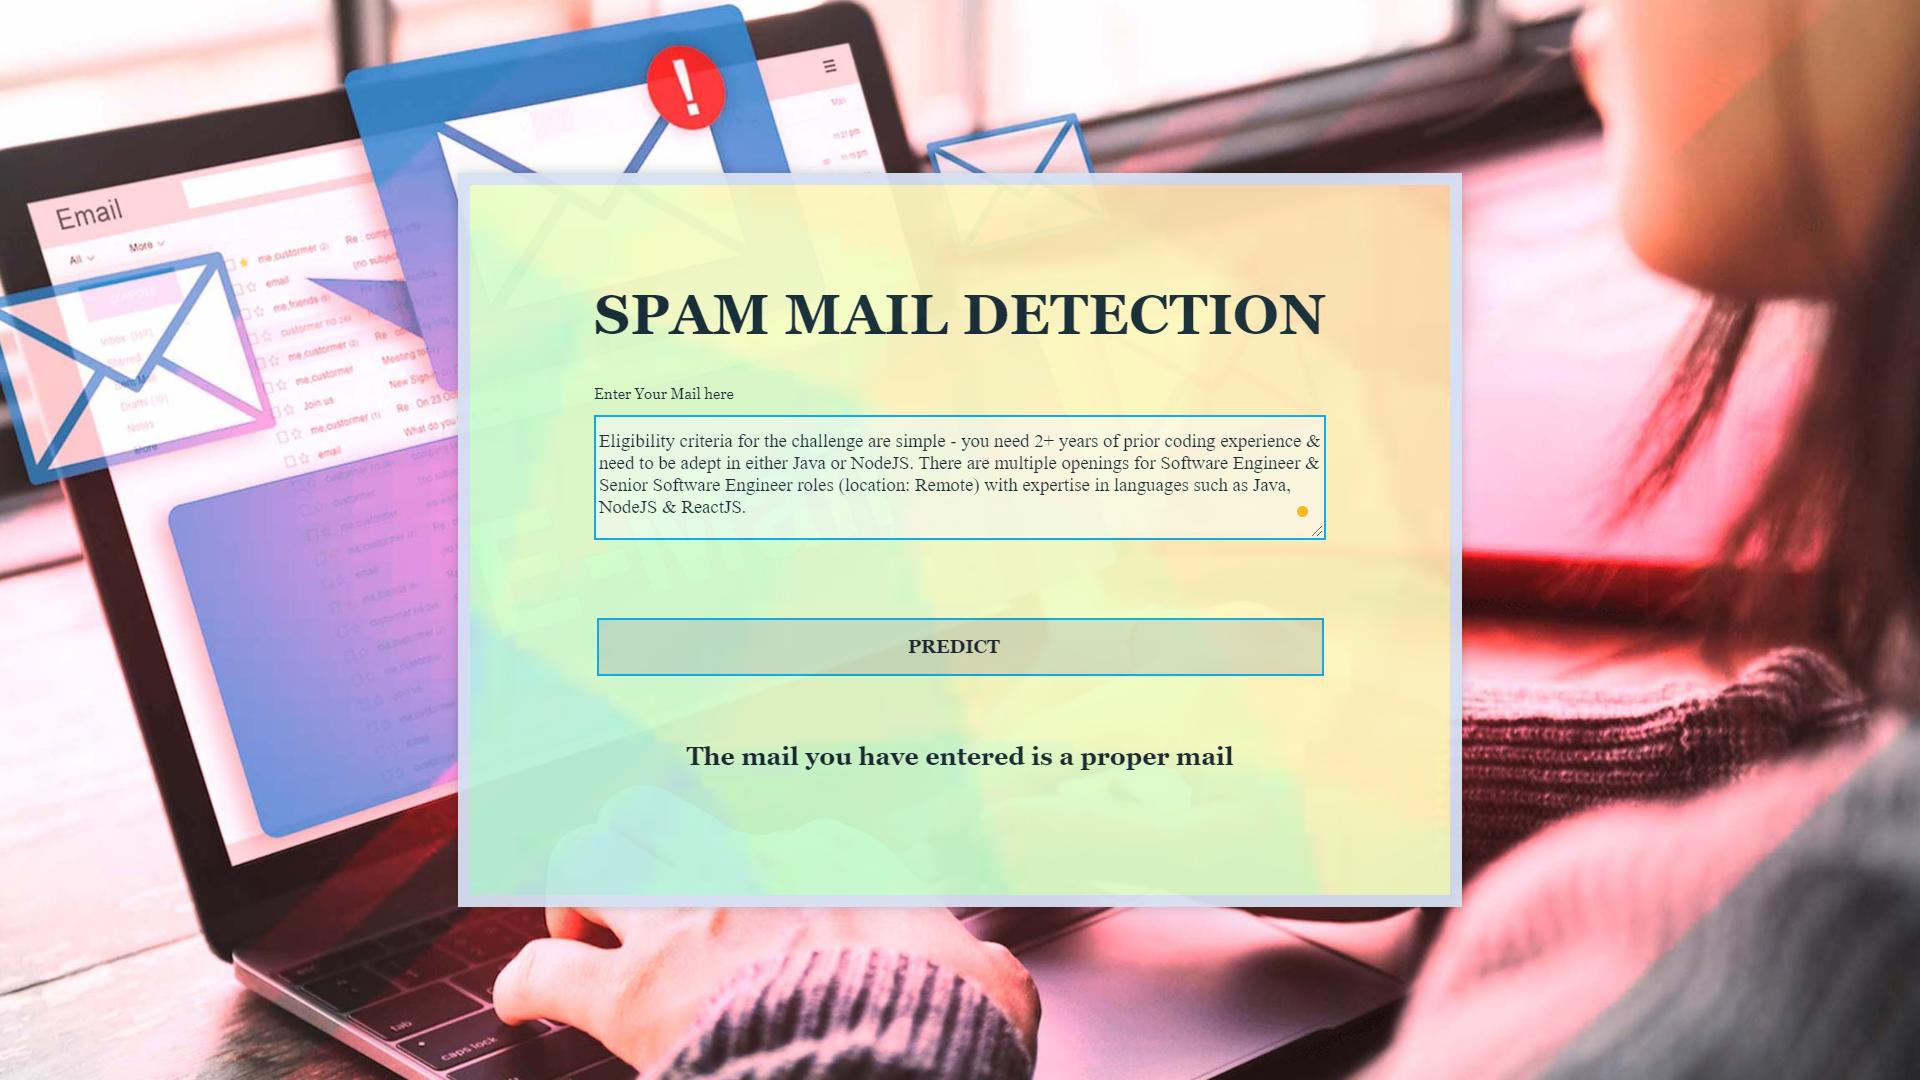

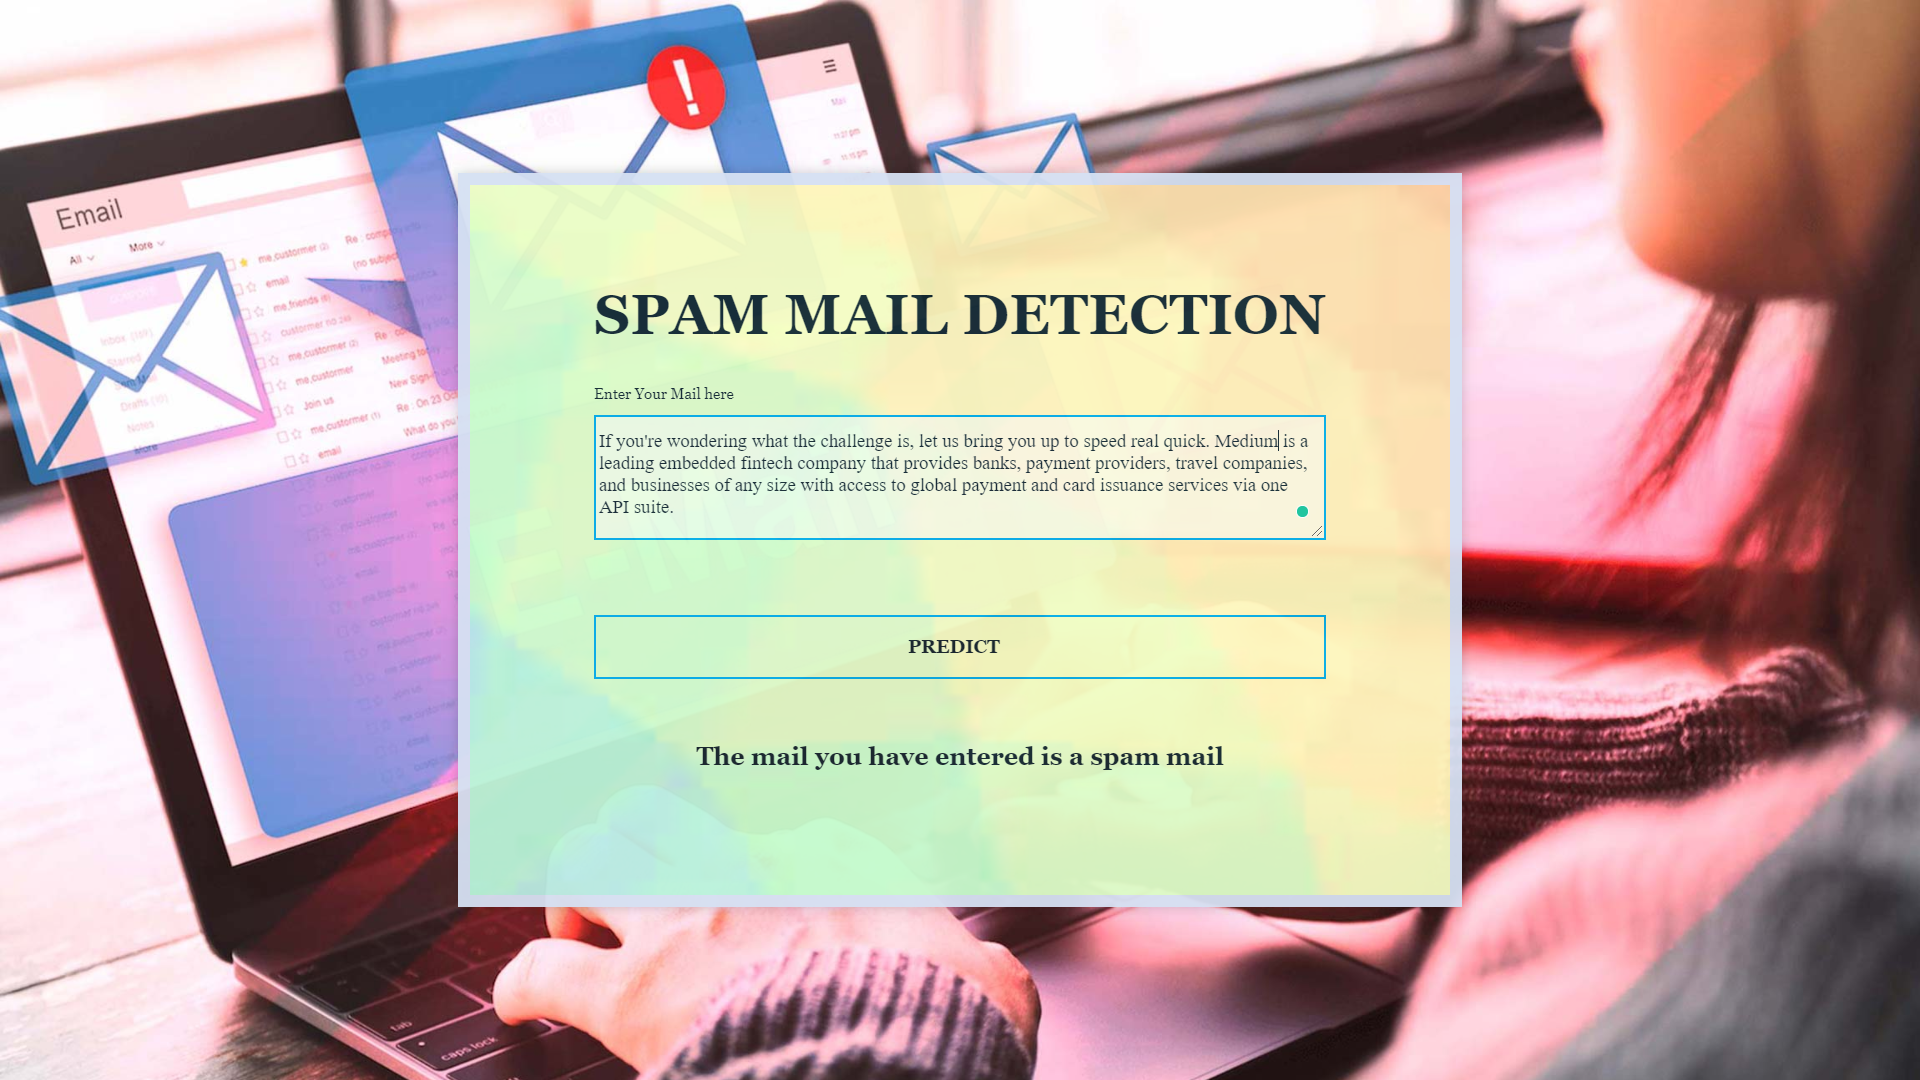

# Thank You